In [1]:
import getpass
# Add the project path here (where batopt.py, markettime.py and the Input folder are located)
PathProj = "C://Users//{usr}//GoogleDrive//Projects//Battery Optimization".format(usr=getpass.getuser())
getpass.sys.path.append(PathProj)

# My modules
from batopt import *

display(BatteryDefns, CA_time)

,Tesla Powerpack
Capacity [kWh],210.0
Power [kW],50.0
Energy-to-Power [h],4.2
DoD [%],100.0
Cycle Efficiency [%],89.0


CAISO market time at GMT-8. DST observed in: 2018

<h3><i><font color=#BA4A00>1) Initialize battery</font></i></h3>

In [2]:
battery = batopt(model='Tesla Powerpack')

<h3><i><font color=#BA4A00>2) Load and set prices</font></i></h3>
Setting the prices formulates the problem.

In [3]:
Prices_CAISO = pd.read_pickle("{}//Input//CAISO_prices_2018.pkl".format(PathProj))

In [4]:
battery.set_prices(Prices_CAISO['USD/kWh'], start_time=("01/01/2018", 1), market_time=CA_time)

Academic license - for non-commercial use only

Problem formulated
<gurobi.Model MIP instance Bat 1: 26281 constrs, 35041 vars, Parameter changes: LogFile=gurobi.log, CSIdleTimeout=1800>

Prices set from 01/01/2018 H01 to 12/31/2018 H24
365 D, 0 H


<h3><i><font color=#BA4A00>3) Solve</font></i></h3>

In [5]:
battery.solve()

Optimize a model with 26281 rows, 35041 columns and 70082 nonzeros
Variable types: 26281 continuous, 8760 integer (8760 binary)
Coefficient statistics:
  Matrix range     [2e-02, 1e+00]
  Objective range  [4e-08, 1e+00]
  Bounds range     [1e+00, 2e+02]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective -0.0000000
Presolve removed 1 rows and 1 columns
Presolve time: 0.15s
Presolved: 26280 rows, 35040 columns, 70080 nonzeros
Variable types: 26280 continuous, 8760 integer (8760 binary)

Root relaxation: objective 3.305771e+03, 5992 iterations, 0.77 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 3305.77092    0   32   -0.00000 3305.77092      -     -    1s
H    0     0                    3305.4200995 3305.77092  0.01%     -    1s
     0     0     cutoff    0      3305.42010 3305.42010  0.00%     -    1s

Cutting planes:
  Gomory: 32
  MIR: 42
  F

<h3><i><font color=#BA4A00>4) Visualize operation</font></i></h3>

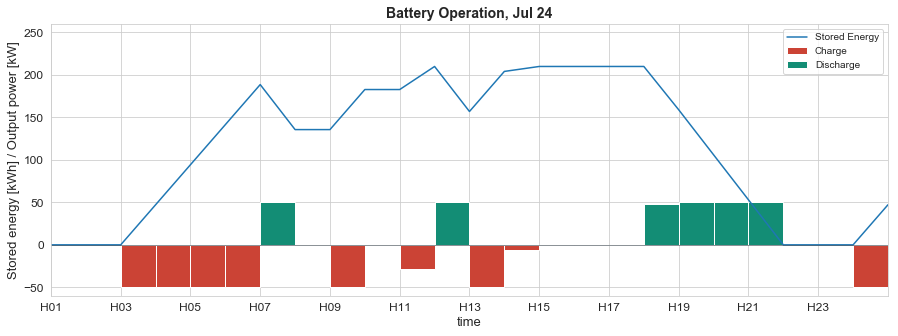

Revenue: 139.82 USD


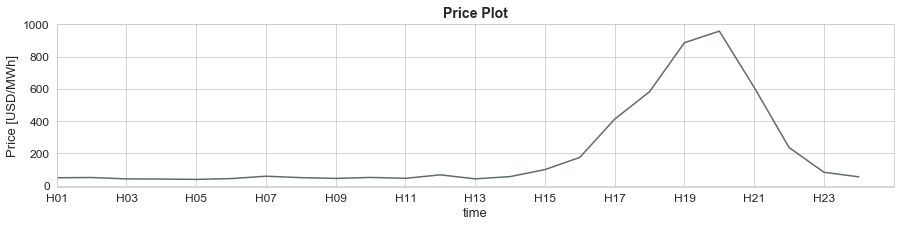

In [13]:
# Jul 23, 24 - extreme price spikes
# Mar 11 - DST ON  (no H3)
# Nov 4  - DST OFF (H25)
battery.plot_24hOperation('Jul 24')

<h3><i><font color=#BA4A00>5) Financial Assessment</font></i></h3>

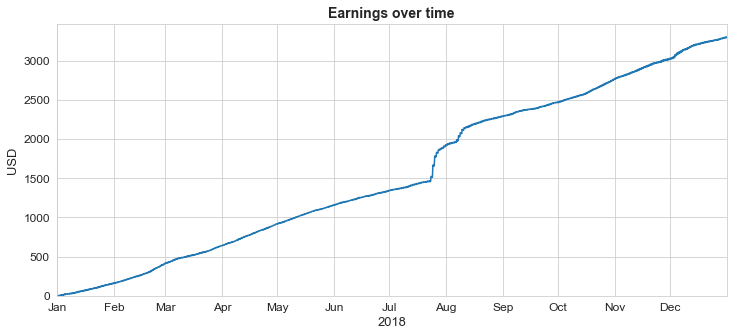

In [7]:
battery.plot_EarningsOverTime()

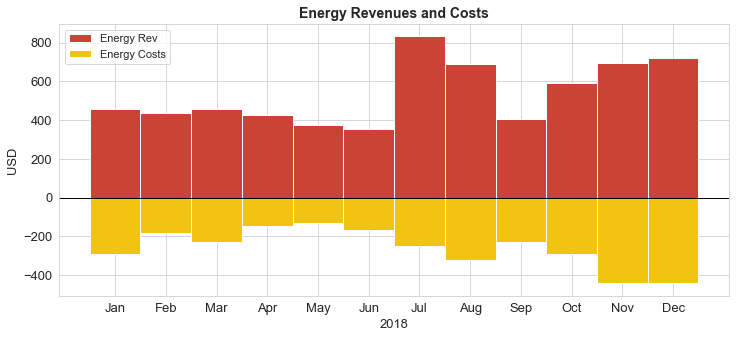

Energy Revenue 	 6434.84 USD
Energy Costs 	 3129.42 USD
Net Earnings 	 3305.42 USD


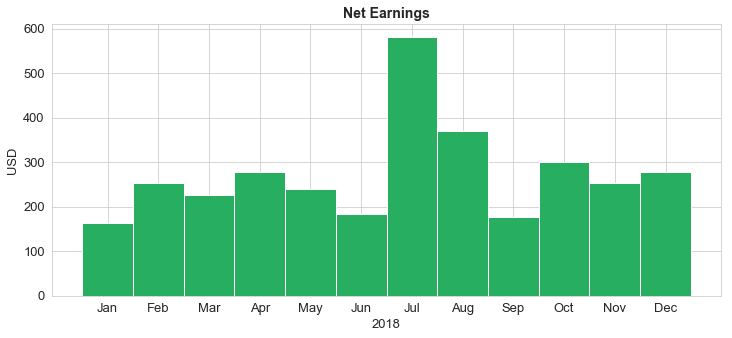

In [8]:
battery.plot_CashFlows('RevAndCosts', Summary=True)
battery.plot_CashFlows('Net')

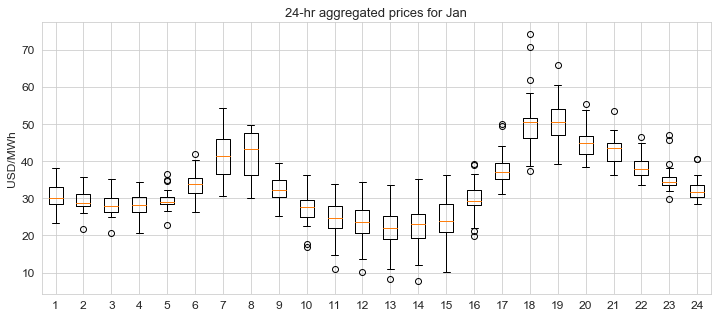

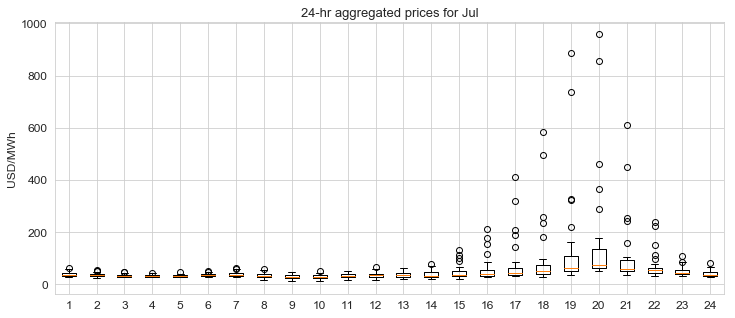

In [9]:
# Plot prices to understand earnings per month
battery.plot_monthprices('Jan')
battery.plot_monthprices('Jul')

In [10]:
battery.stats

,Energy Consumed,Energy Released,Energy Lost,Energy Revenue,Energy Costs,Net Earnings
Jan,11.4917,10.2276,1.26408,455.16,291.22,163.94
Feb,10.6638,9.49079,1.17302,436.6,182.49,254.11
Mar,11.5247,10.257,1.26772,457.14,231.61,225.53
Apr,11.0795,9.86075,1.21874,424.31,146.46,277.85
May,11.209,9.97602,1.23299,372.42,131.78,240.64
Jun,9.1977,8.18595,1.01175,352.06,167.81,184.25
Jul,8.11312,7.22068,0.892444,832.38,250.93,581.45
Aug,9.40314,8.36879,1.03435,690.22,320.8,369.42
Sep,9.619,8.51641,1.10259,405.66,229.23,176.43
Oct,11.511,10.2892,1.2217,591.08,291.11,299.97


<h3><i><font color=#BA4A00>Simple Payback Period with AS Revenue</font></i></h3>
Calculate the payback period with a given interest rate. Let the battery have (fixed) revenue from energy arbitrage and ancillary services, and energy costs.

<br><b>References</b><br>
<a href="https://electrek.co/2019/02/18/tesla-big-battery-pay-for-itself/">Tesla’s 100MW/129MWh Powerpack project in South Australia</a> <br>
<a href="https://cleantechnica.com/2018/06/09/100-kwh-tesla-battery-cells-this-year-100-kwh-tesla-battery-packs-in-2020/">100USD/kWh Tesla Cells</a>

In [11]:
# Yearly financial figures
Rev_energy = 6435
Rev_AS = 1.5*Rev_energy
Cost_energy = 3130
# -------------------------------------------------------------
Account = simple_payback(Rev_energy, Rev_AS, Cost_energy, 
                         Battery_kWh=210, 
                         i=0.05, 
                         USD_perkWh=180, 
                         percent_storage_costs=70)

Payback period: 5 yrs


In [12]:
Account

array([-54000.  , -43742.5 , -32972.12, -21663.23,  -9788.89,   2679.17])